In [3]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
###set file for imports
t='_d2_v2'

In [5]:
##### import GAMS results
#########ra characteristics

hhtrn0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/hhtrn0_d_rpt.csv'%t)
del hhtrn0_d_rpt['file']
hhtrn0_d_rpt=hhtrn0_d_rpt.groupby(['r','h','sk'],as_index=False).sum()

#savings
sav0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/sav0_d_rpt.csv'%t)
del sav0_d_rpt['file']

#labor tax rate
tl0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/tl0_d_rpt.csv'%t)
del tl0_d_rpt['file']

#updated capital endowment
ke0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ke0_d_rpt.csv'%t)
del ke0_d_rpt['file']

##############################################################################
##############################################################################

#initial labor endowment
le0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt.csv'%t)
del le0_d_rpt['file']

#new labor endowment
le0_d_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/le0_d_rpt0.csv'%t)
del le0_d_rpt0['file']

#cons0_rpt(r,h,sk)=c0_h_d(r,h,sk);
cons0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cons0_rpt.csv'%t)
del cons0_rpt['file']

#new welfare
w_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/w_rpt0.csv'%t)
del w_rpt0['file']

##wages
pl_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pl_rpt0.csv'%t)
del pl_rpt0['file']

###consumer price index
pc_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pc_rpt0.csv'%t)
del pc_rpt0['file']

###rental rate of capital
rk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/rk_rpt0.csv'%t)
del rk_rpt0['file']

####cons demand benchmark
cd0_h_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/cd0_h_d_rpt.csv'%t)
del cd0_h_d_rpt['file']

####sector labor demand by skill
ld0_d_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ld0_d_rpt.csv'%t)
# del ld0_d_rpt['file']

####output changes by sector 
y_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/y_rpt0.csv'%t)
del y_rpt0['file']

####imports 

a_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/a_rpt0.csv'%t)
del a_rpt0['file']

ys0_rpt=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ys0_rpt.csv'%t)
del ys0_rpt['file']

####output changes by sector 
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/py_rpt0.csv'%t)
del py_rpt0['file']

####price of capital 
pk_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pk_rpt0.csv'%t)
del pk_rpt0['file']

####foreign exchange price
pfx_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pfx_rpt0.csv'%t)
del pfx_rpt0['file']

####foreign exchange price
pn_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/pn_rpt0.csv'%t)
del pn_rpt0['file']

####ra after shock
ra_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/ra_rpt0.csv'%t)
del ra_rpt0['file']

####consumption after shock
c_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/c_rpt0.csv'%t)
del c_rpt0['file']


kd0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/kd0_rpt.csv'%t)
del kd0_rpt['file']

###intermediate goods demand

id0_rpt= pd.read_csv('/Users/hannahkamen/Downloads/clim/csv%s/id0_rpt.csv'%t)
del id0_rpt['file']

# ###INITIAL LABOR SUPPLY
# labor_b=pd.read_csv('/Users/hannahkamen/Downloads/csv%s/le0_d_rpt00.csv'%t)
# labor_b=labor_b[['file','region','household','benchmark_le0','skill']].reset_index()
# labor_b=labor_b.rename(columns={'file':'r','region':'q','skill':'sk','household':'h'})
# del labor_b['index']


shares=pd.read_csv('/Users/hannahkamen/Downloads/le0_shr2.csv')

shares_u=shares.drop_duplicates(subset=['q','h','sk']).pivot(index=['q','h'],columns='sk',values='skill_shr').reset_index()
shares_u['diff']=shares_u['skl']-shares_u['unskl']


shocks=pd.read_csv('/Users/hannahkamen/Downloads/le0_shock0_v2_test2_adj.csv')
shocks=shocks.rename(columns={'skill_shr':'pct_shock'})

shocks_lm=shocks[(shocks['r']==shocks['q'])]



In [6]:
#####Get weighted CPI
#labor endowment after shock

#labor endowment after shock
le0_d_gr=le0_d_rpt0.groupby(by=['region','skill'],as_index=False).sum()
le0_d_gr=le0_d_gr.rename(columns={'le0_shock0':'le0_shock0_tot'})
le0_d_rpt0=le0_d_rpt0.merge(le0_d_gr,on=['region','skill'])

le0_d_rpt0['hh_weight']=le0_d_rpt0['le0_shock0']/le0_d_rpt0['le0_shock0_tot']

weighted_pc=le0_d_rpt0.merge(pc_rpt0,on=['region','household','skill'])
weighted_pc['weighted_pc']=weighted_pc['hh_weight']*weighted_pc['pc_shock0']

In [7]:
weighted_pc_gr=weighted_pc.groupby(by=['region','skill'],as_index=False).sum()

Text(0, 0.5, 'Pct Change')

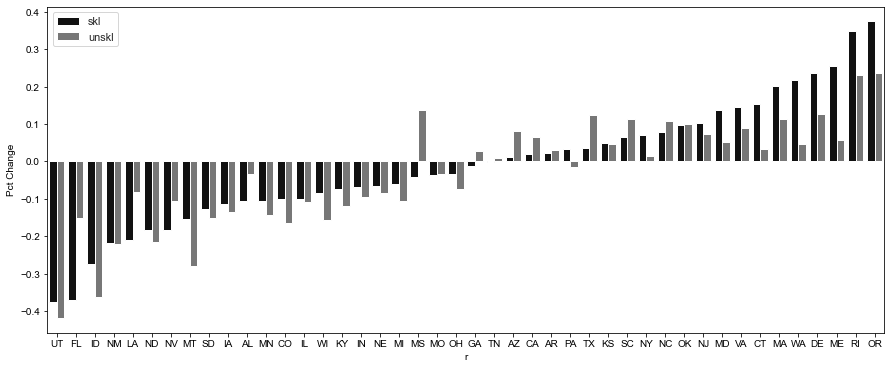

In [8]:
####plot labor endowment changes
fig, ax = plt.subplots(1, 1,figsize=(15,6))
shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).reset_index()
shocks_lm=shocks_lm[~shocks_lm['r'].isin(['AK','DC','HI','NH','VT','WY','WV'])]
sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=shocks_lm,
    x="r", y='pct_shock',hue='sk',
   palette=['#111111','#777777']
)
plt.legend(loc='upper left')
plt.ylabel("Pct Change")
#g.legend.set_title("")

In [20]:
pl_real=pl_rpt0.merge(weighted_pc_gr,on=['region','skill'])
pl_real['real_wages']=pl_real['pl_shock0']/pl_real['weighted_pc']
pl_real['real_diff']=pl_real['real_wages']-1
pl_real['pl_diff']=pl_real['pl_shock0']-1
pl_real['real_wage_diff']=pl_real['real_wages']

In [21]:
pl_real_sk=pl_real[pl_real['skill']=='skl']
pl_real_unsk=pl_real[pl_real['skill']=='unskl']

In [22]:
list(pl_real)

['region',
 'skill',
 'pl_shock0',
 'le0_shock0',
 'le0_shock0_tot',
 'hh_weight',
 'pc_shock0',
 'weighted_pc',
 'real_wages',
 'real_diff',
 'pl_diff',
 'real_wage_diff']

Text(0, 0.5, 'Real Wage Gap Change Skilled Less Unskilled')

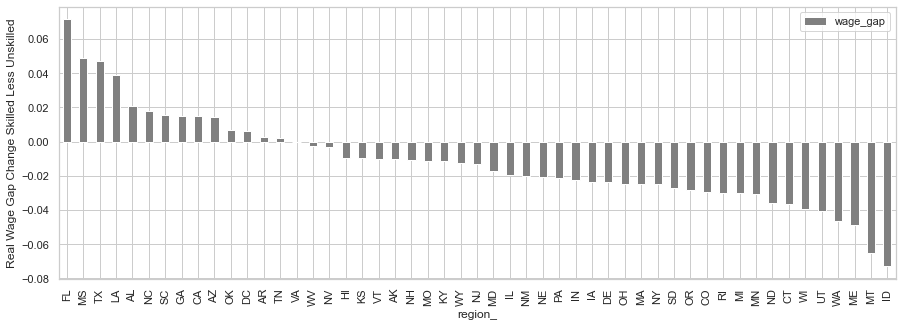

In [23]:
pl_real_lm2=pl_real[['region','skill','real_wage_diff','real_diff','pl_diff']].pivot_table(index='region',columns='skill',values=['real_wage_diff','real_diff','pl_diff']).reset_index()
pl_real_lm2.columns = ["_".join((j,k)) for j,k in pl_real_lm2.columns]

pl_real_lm2['wage_gap']=pl_real_lm2['real_diff_skl']-pl_real_lm2['real_diff_unskl']
pl_real_lm2=pl_real_lm2[['region_','wage_gap']]
fig, ax = plt.subplots(1, 1,figsize=(15,5))
pl_real_lm2=pl_real_lm2.sort_values(by='wage_gap', ascending=False)
pl_real_lm2.set_index('region_').plot(kind='bar',ax=ax,color='gray')
plt.ylabel('Real Wage Gap Change Skilled Less Unskilled')


Text(0.5, 0, 'Real Wage Change Less Nominal Wage Change')

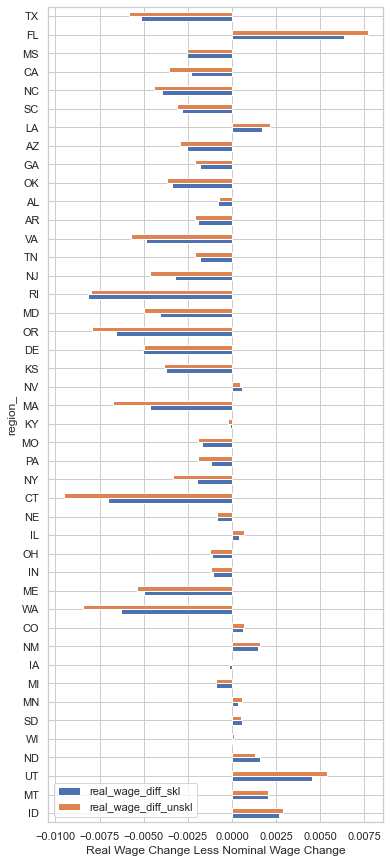

In [24]:
pl_real['real_wage_diff']=pl_real['real_diff']-pl_real['pl_diff']

pl_real=pl_real[~pl_real['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])]

fig, ax = plt.subplots(1, 1,figsize=(6,15))

pl_real_lm=pl_real[['region','skill','real_wage_diff','real_diff','pl_diff']].pivot_table(index='region',columns='skill',values=['real_wage_diff','real_diff','pl_diff']).reset_index()
pl_real_lm.columns = ["_".join((j,k)) for j,k in pl_real_lm.columns]

pl_real_lm=pl_real_lm.sort_values(by='pl_diff_unskl',ascending=False)
pl_real_lm=pl_real_lm[['region_','real_wage_diff_skl','real_wage_diff_unskl']]
pl_real_lm.set_index('region_').plot(kind='barh',ax=ax)
plt.xlabel('Real Wage Change Less Nominal Wage Change')


In [29]:
real_change_scatter.scatter?

Object `real_change_scatter.scatter` not found.


In [37]:
saiz

,Region,Elasticity of Substitution Between Land and Other Factors,elasticity
0,FL,0.6000,0.031579
1,CA,0.6300,0.033158
2,UT,0.7500,0.039474
3,NY,0.7600,0.040000
4,LA,0.8100,0.042632
5,IL,0.8100,0.042632
6,NC,0.8200,0.043158
7,VA,0.8200,0.043158
8,MA,0.8600,0.045263
9,NH,0.8600,0.045263


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='py0', ylabel='real_wage_diff_skl'>

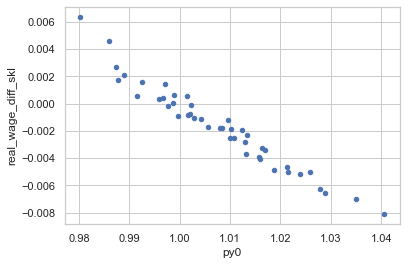

In [38]:
##try elasticities
saiz=pd.read_csv('/Users/hannahkamen/Downloads/elasticity_lookup_final_min.csv')
saiz['elasticity']=(saiz['Elasticity of Substitution Between Land and Other Factors']*.05)/.95
###try housing prices
py_rpt0=pd.read_csv('/Users/hannahkamen/Downloads/clim/csv_d2_v2/py_rpt0.csv')
phou=py_rpt0[py_rpt0['good']=='hou']
real_change_scatter=pl_real_lm.merge(phou,left_on='region_',right_on='region')

real_change_scatter.plot(x='py0',y='real_wage_diff_skl',kind='scatter')

In [33]:
real_change_scatter

,region_,real_wage_diff_skl,real_wage_diff_unskl,file,region,good,py0
0,ID,0.002697,0.002903,staticmodel_d2_v2_it0,ID,hou,0.987464
1,MT,0.002055,0.002031,staticmodel_d2_v2_it0,MT,hou,0.988920
2,UT,0.004559,0.005400,staticmodel_d2_v2_it0,UT,hou,0.986073
3,ND,0.001591,0.001302,staticmodel_d2_v2_it0,ND,hou,0.992578
4,WI,0.000072,0.000098,staticmodel_d2_v2_it0,WI,hou,0.998691
5,SD,0.000587,0.000516,staticmodel_d2_v2_it0,SD,hou,0.991634
6,MN,0.000362,0.000553,staticmodel_d2_v2_it0,MN,hou,0.995847
7,MI,-0.000895,-0.000886,staticmodel_d2_v2_it0,MI,hou,0.999698
8,IA,-0.000178,-0.000078,staticmodel_d2_v2_it0,IA,hou,0.997708
9,NM,0.001464,0.001589,staticmodel_d2_v2_it0,NM,hou,0.997027


(-0.04, 0.09)

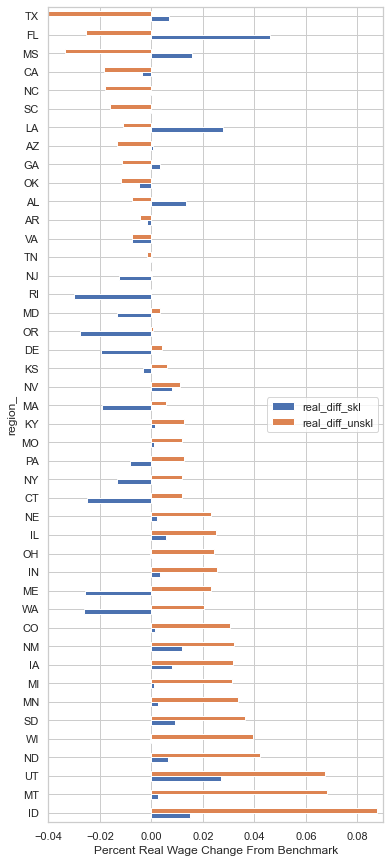

In [96]:
fig, ax = plt.subplots(1, 1,figsize=(6,15))

pl_real_lm=pl_real[['region','skill','real_wage_diff','real_diff','pl_diff']].pivot_table(index='region',columns='skill',values=['real_wage_diff','real_diff','pl_diff']).reset_index()
pl_real_lm.columns = ["_".join((j,k)) for j,k in pl_real_lm.columns]
pl_real_lm=pl_real_lm.sort_values(by='pl_diff_unskl',ascending=False)
pl_real_lm=pl_real_lm[['region_','real_diff_skl','real_diff_unskl']]

pl_real_lm.set_index('region_').plot(kind='barh',ax=ax)
plt.xlabel('Percent Real Wage Change From Benchmark')
plt.xlim(-0.04,0.09)










(-0.04, 0.09)

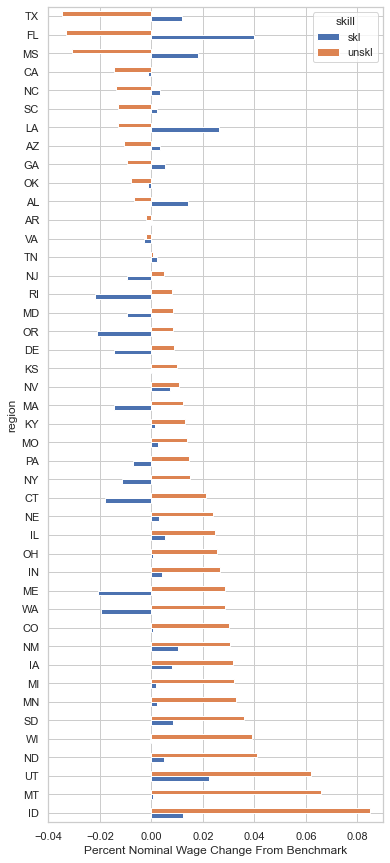

In [81]:
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1
pl_rpt0=pl_rpt0[~pl_rpt0['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])]

fig, ax = plt.subplots(1, 1,figsize=(6,15))
pl_rpt0_lm=pl_rpt0[['region','skill','pl_diff']].pivot_table(index='region',columns='skill',values='pl_diff').reset_index()
pl_rpt0_lm=pl_rpt0_lm.sort_values(by='unskl',ascending=False)
pl_rpt0_lm.set_index('region').plot(kind='barh',ax=ax)
plt.xlabel('Percent Nominal Wage Change From Benchmark')
plt.xlim(-0.04,0.09)


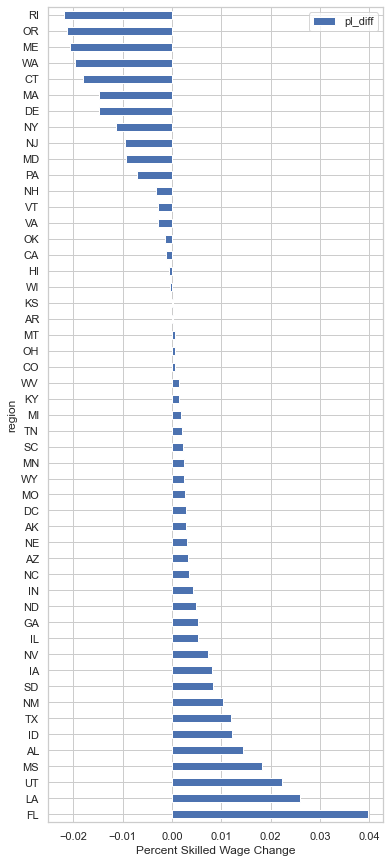

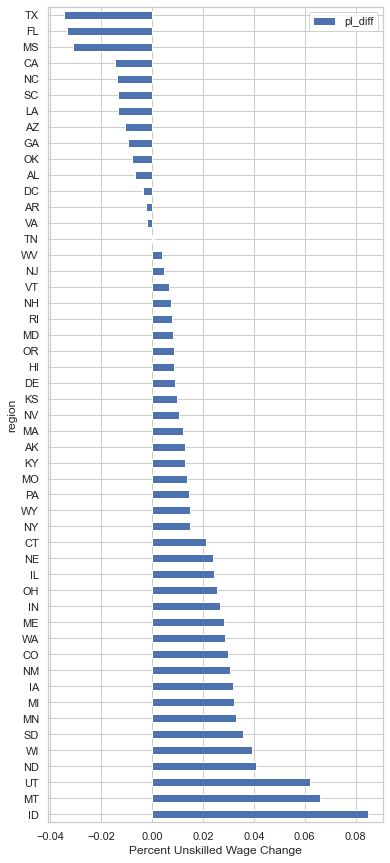

In [33]:
####plot horizontal par chart of wage changes by skill type
pl_rpt0['pl_diff']=pl_rpt0['pl_shock0']-1

for skl,lab in zip(['skl','unskl'],['Skilled','Unskilled']):
    
    fig, ax = plt.subplots(1, 1,figsize=(6,15))
    
    pl_rpt0_lm=pl_rpt0[pl_rpt0['skill']==skl][['region','pl_diff']]
    pl_rpt0_lm=pl_rpt0_lm.sort_values(by='pl_diff',ascending=False)

    pl_rpt0_lm.set_index('region').plot(kind='barh',ax=ax)
    plt.xlabel('Percent %s Wage Change'%lab)
#     plt.legend(labels=['sk l','unsk l','capital','int good'])

Text(0, 0.5, 'Pct Change Nominal Wage')

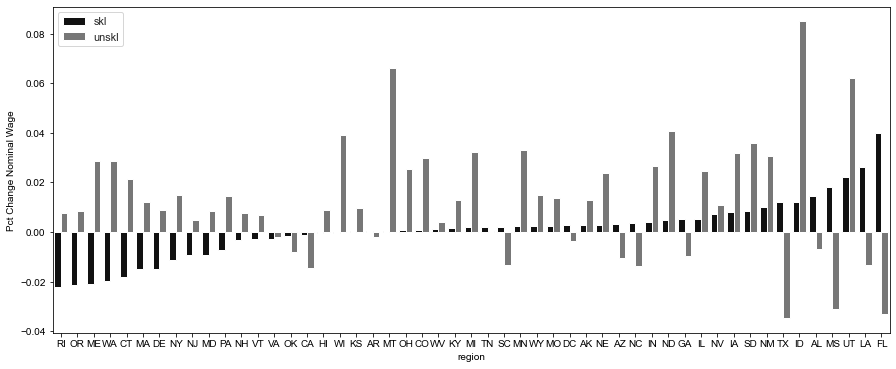

In [13]:


fig, ax = plt.subplots(1, 1,figsize=(15,6))
pl_rpt0=pl_rpt0.sort_values(by=['skill','pl_diff'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=pl_rpt0,
    x="region", y='pl_diff',hue='skill',
   palette=['#111111','#777777']
)

plt.legend(loc='upper left')
plt.ylabel("Pct Change Nominal Wage")
#g.legend.set_title("")

In [17]:
Maryz
labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


# shocks_lm=shocks_lm.sort_values(by=['sk','pct_shock'],ascending=True).drop_duplicates(subset=['r','sk'])
labor_wage_pvt=labor_wage.pivot_table(index='r',columns='sk',values=['pct_shock','wage_diff'])
labor_wage_pvt.columns = ["_".join((j,k)) for j,k in labor_wage_pvt.columns]
labor_wage_pvt=labor_wage_pvt.reset_index()
labor_wage_pvt['difference']=labor_wage_pvt['pct_shock_skl']-labor_wage_pvt['pct_shock_unskl']

labor_wage_pvt['abs_skl_shock']=abs(labor_wage_pvt['pct_shock_skl'])
labor_wage_pvt['abs_unskl_shock']=abs(labor_wage_pvt['pct_shock_unskl'])


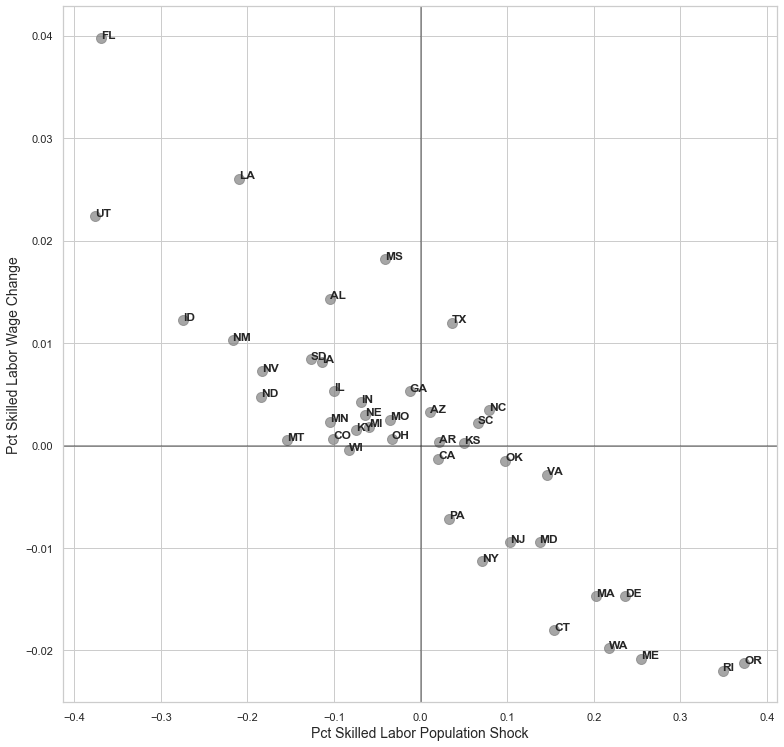

In [25]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'pct_shock_skl','wage_diff_skl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Skilled Labor Population Shock',fontsize=14)
plt.ylabel('Pct Skilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_skl.iat[i],labor_wage_pvt.wage_diff_skl.iat[i]),fontsize=12,weight='bold')
plt.show()



    

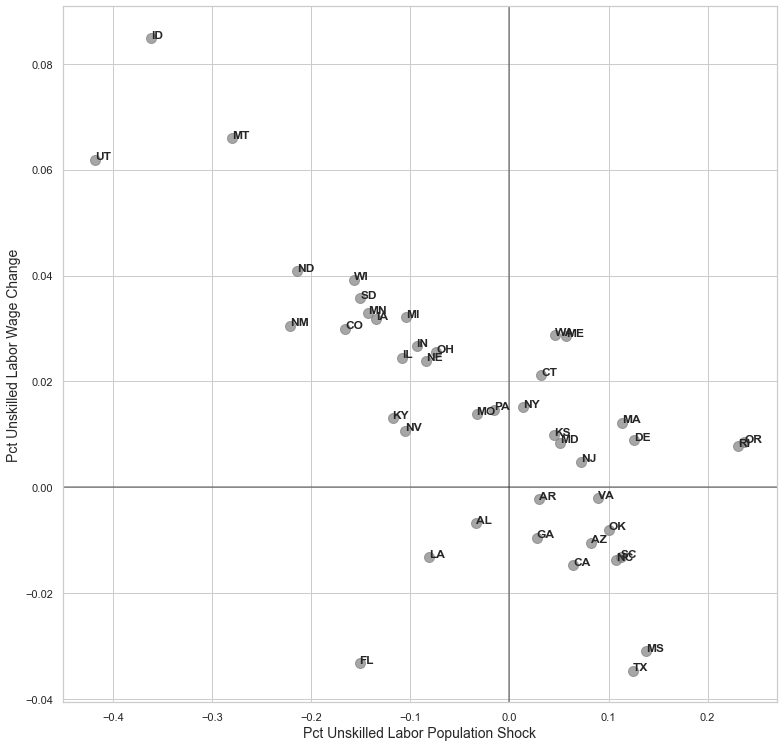

In [26]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'pct_shock_unskl','wage_diff_unskl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Unskilled Labor Population Shock',fontsize=14)
plt.ylabel('Pct Unskilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.pct_shock_unskl.iat[i],labor_wage_pvt.wage_diff_unskl.iat[i]),fontsize=12,weight='bold')
plt.show()

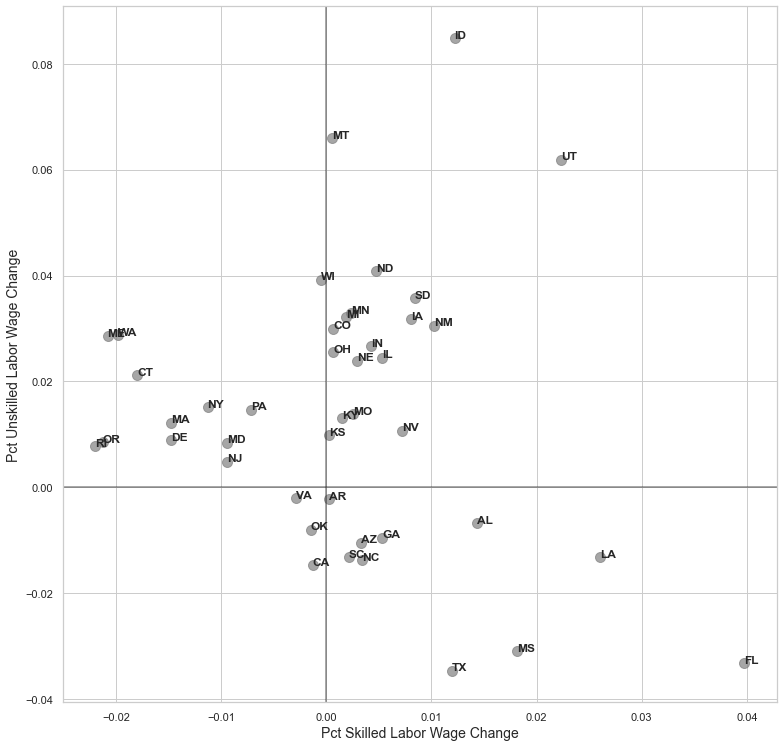

In [27]:
fig, ax = plt.subplots(1, 1,figsize=(12.8,12.8))

labor_wage_pvt.plot.scatter( 'wage_diff_skl','wage_diff_unskl',ax=ax,c='grey',alpha=.7,s=100)

plt.xlabel('Pct Skilled Labor Wage Change',fontsize=14)
plt.ylabel('Pct Unskilled Labor Wage Change',fontsize=14)

ax.axhline(0, linestyle='-', color='k',alpha=.5) # horizontal lines
ax.axvline(0, linestyle='-', color='k',alpha=.5) # vertical lines

for i, txt in enumerate(labor_wage_pvt.r):
    ax.annotate(txt, (labor_wage_pvt.wage_diff_skl.iat[i],labor_wage_pvt.wage_diff_unskl.iat[i]),fontsize=12,weight='bold')
plt.show()

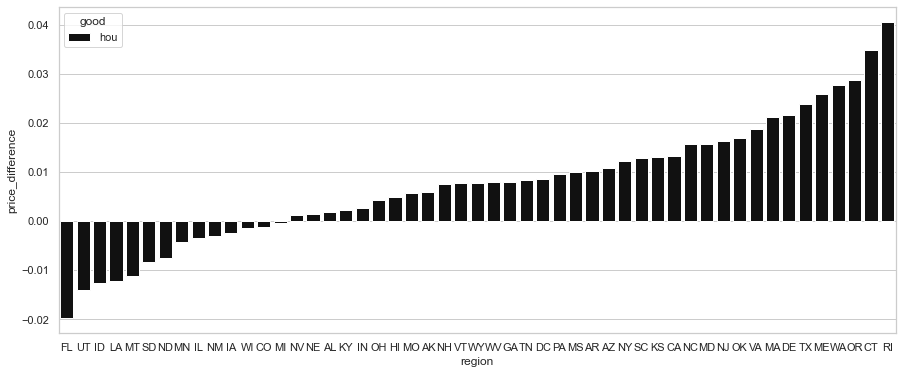

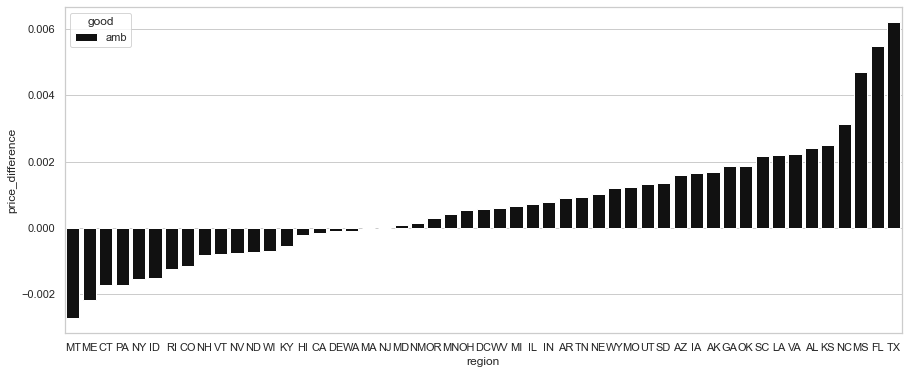

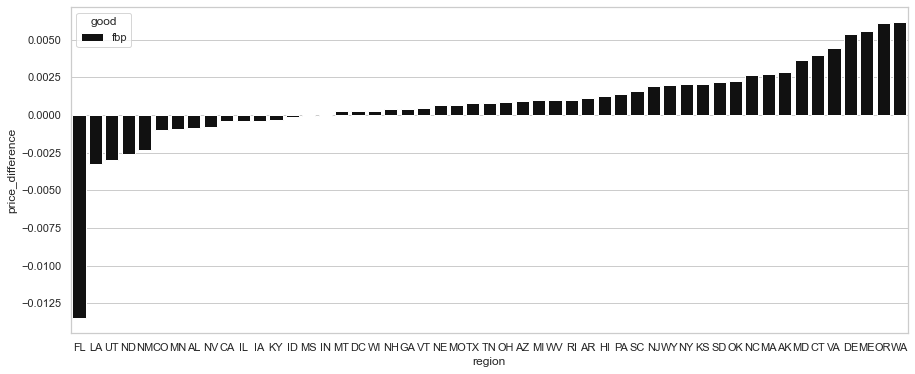

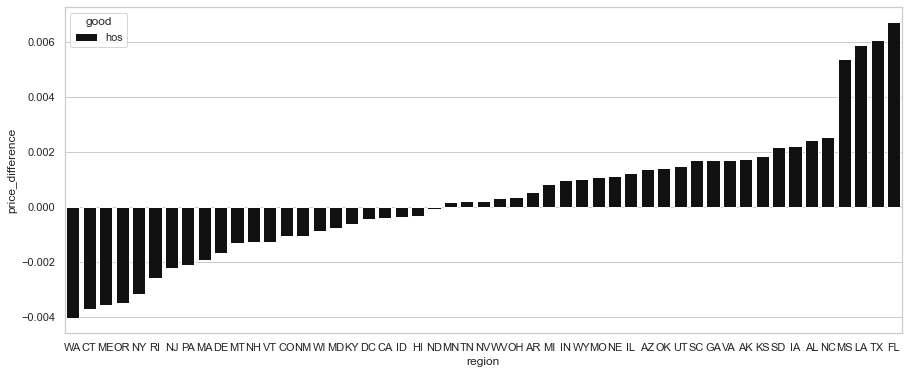

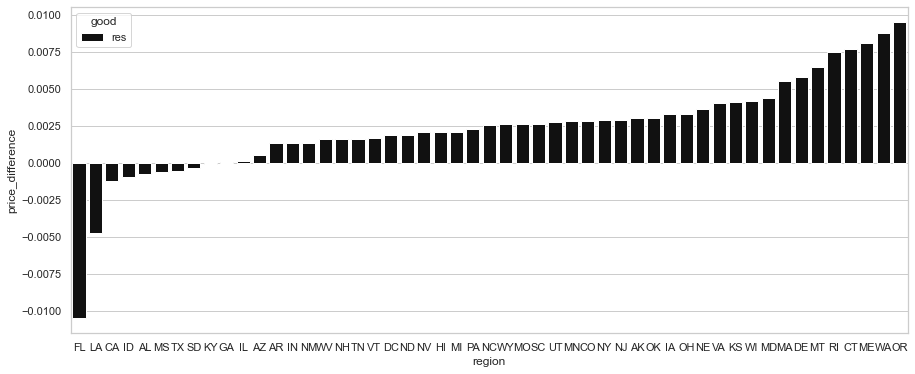

In [34]:
for g in ['hou','amb','fbp','hos','res',]:
    change_in_py=py_rpt0[py_rpt0['good']==g]
    change_in_py['price_difference']=change_in_py['py0']-1

    fig, ax = plt.subplots(1, 1,figsize=(15,6))
    change_in_py=change_in_py.sort_values(by=['price_difference'],ascending=True).reset_index()

    sns.set_theme(style="whitegrid")
    g = sns.barplot(
        data=change_in_py,
        x="region", y='price_difference',hue='good',
       palette=['#111111']
    )

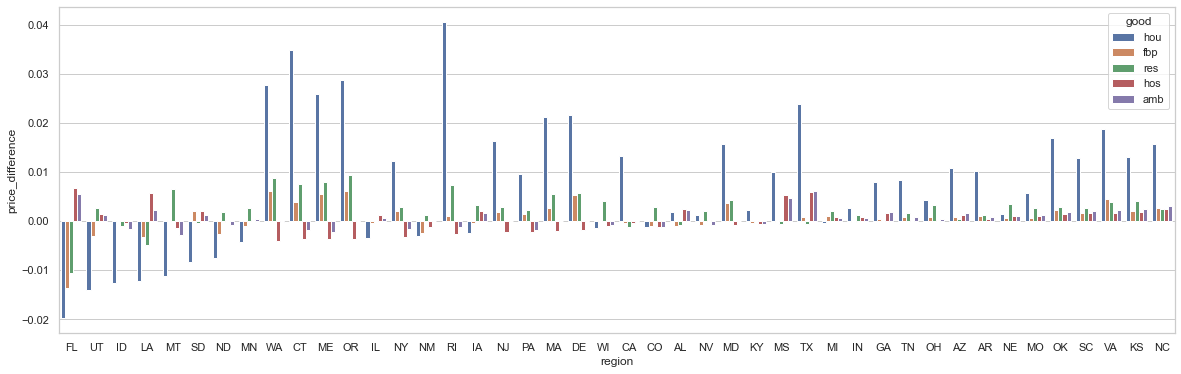

In [39]:

change_in_py=py_rpt0[py_rpt0['good'].isin(['hou','amb','fbp','hos','res'])]
change_in_py['price_difference']=change_in_py['py0']-1

fig, ax = plt.subplots(1, 1,figsize=(20,6))
change_in_py=change_in_py.sort_values(by=['price_difference'],ascending=True).reset_index()

sns.set_theme(style="whitegrid")
g = sns.barplot(
    data=change_in_py[~change_in_py['region'].isin(['AK','DC','HI','NH','VT','WY','WV'])],
    x="region", y='price_difference',hue='good'
)